## Histogram of the image values

In [1]:
import celestializer as cl
from tqdm import tqdm

In [9]:
files = cl.list_observations()
df = cl.raw_to_df(files)

img_sky = cl.RawImage(cl.Paths.observations / "2024-11-05/IMG_3320.CR2").load()
img_black = cl.RawImage(cl.Paths.calibration / "2024-11-05/IMG_3330.CR2").load()
img_white = cl.RawImage(cl.Paths.calibration / "2025-01-19/IMG_3358.CR2").load()
img_sky.metadata.model_dump()

{'width': 5202,
 'height': 3465,
 'focal_length': 18.0,
 'aperture': 3.5,
 'shutter': 10.0,
 'iso': 6400,
 'timestamp': datetime.datetime(2024, 11, 5, 0, 37, 58),
 'camera': 'Canon EOS 1200D',
 'bit_depth': 14}

100%|██████████| 3/3 [00:01<00:00,  2.10it/s]


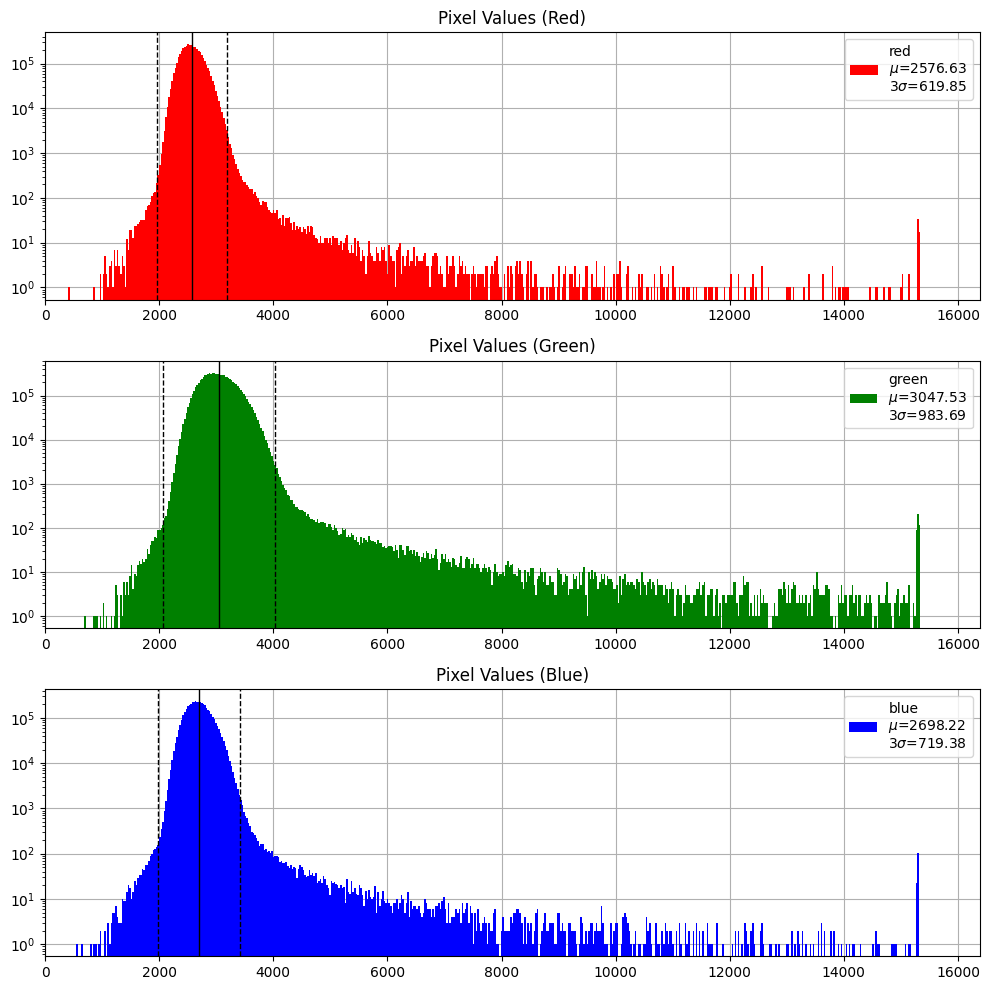

In [ ]:
raw = img_sky.raw()
subplot_funcs = [[h] for h in cl.rgb_histograms(raw, title="Pixel Values")]
fig = cl.subplots_grid(subplot_funcs, figsize=(10, 10))
fig.savefig(cl.Paths.saved / "histograms_sky.png", dpi=300, bbox_inches="tight")
display(fig)

100%|██████████| 6/6 [00:02<00:00,  2.03it/s]


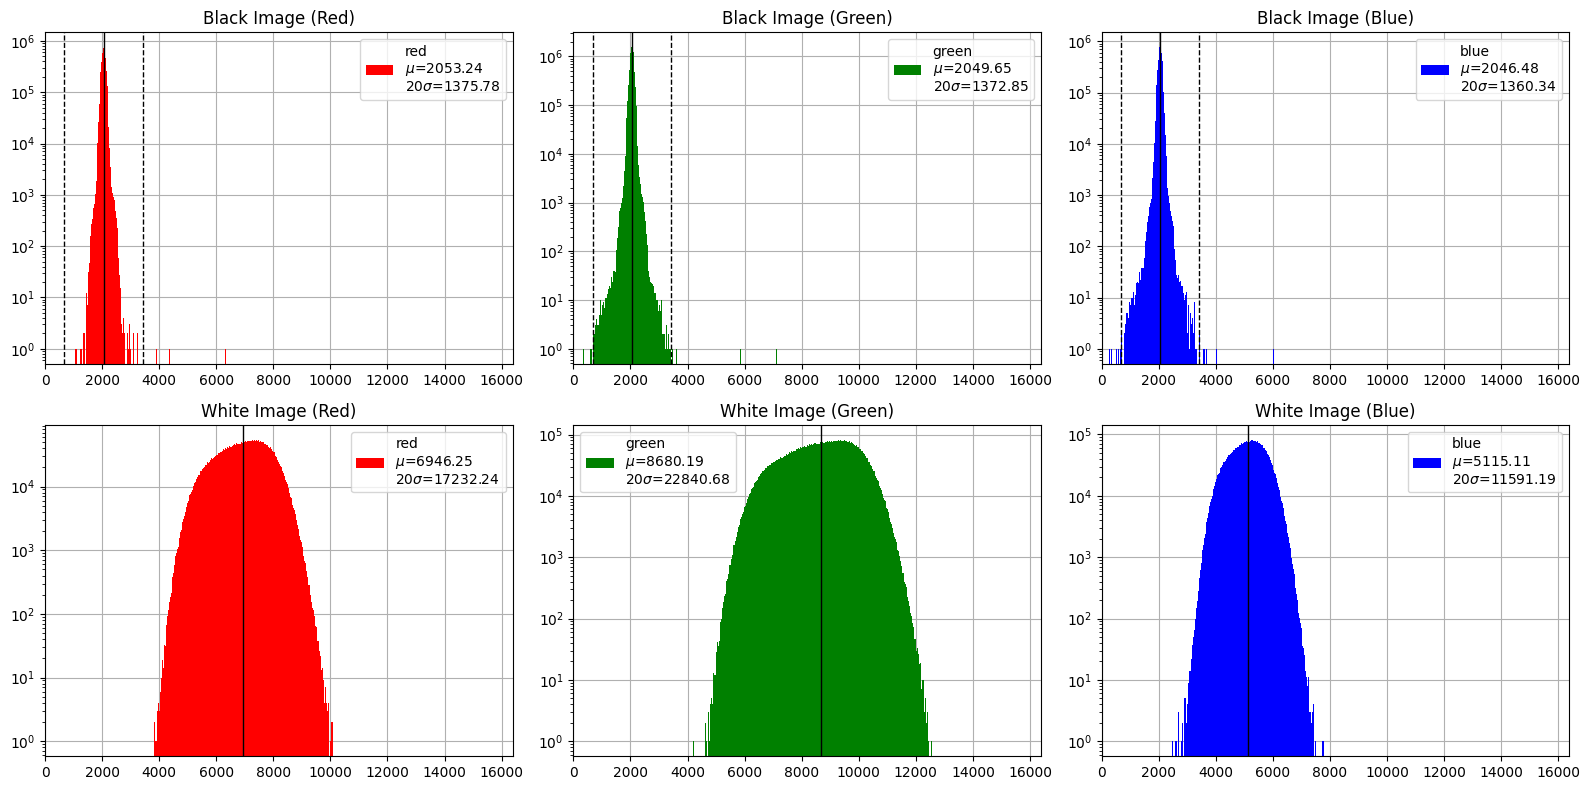

In [ ]:
subplot_funcs = [
    cl.rgb_histograms(img_black.raw(), title="Black Image", sigma_factor=20),
    cl.rgb_histograms(img_white.raw(), title="White Image", sigma_factor=20),
]
fig = cl.subplots_grid(subplot_funcs, figsize=(16, 8))
fig.savefig(cl.Paths.saved / "histograms_calibration.png", dpi=300, bbox_inches="tight")
display(fig)

Load images


100%|██████████| 8/8 [00:18<00:00,  2.33s/it]


Plot histograms


100%|██████████| 24/24 [00:10<00:00,  2.28it/s]


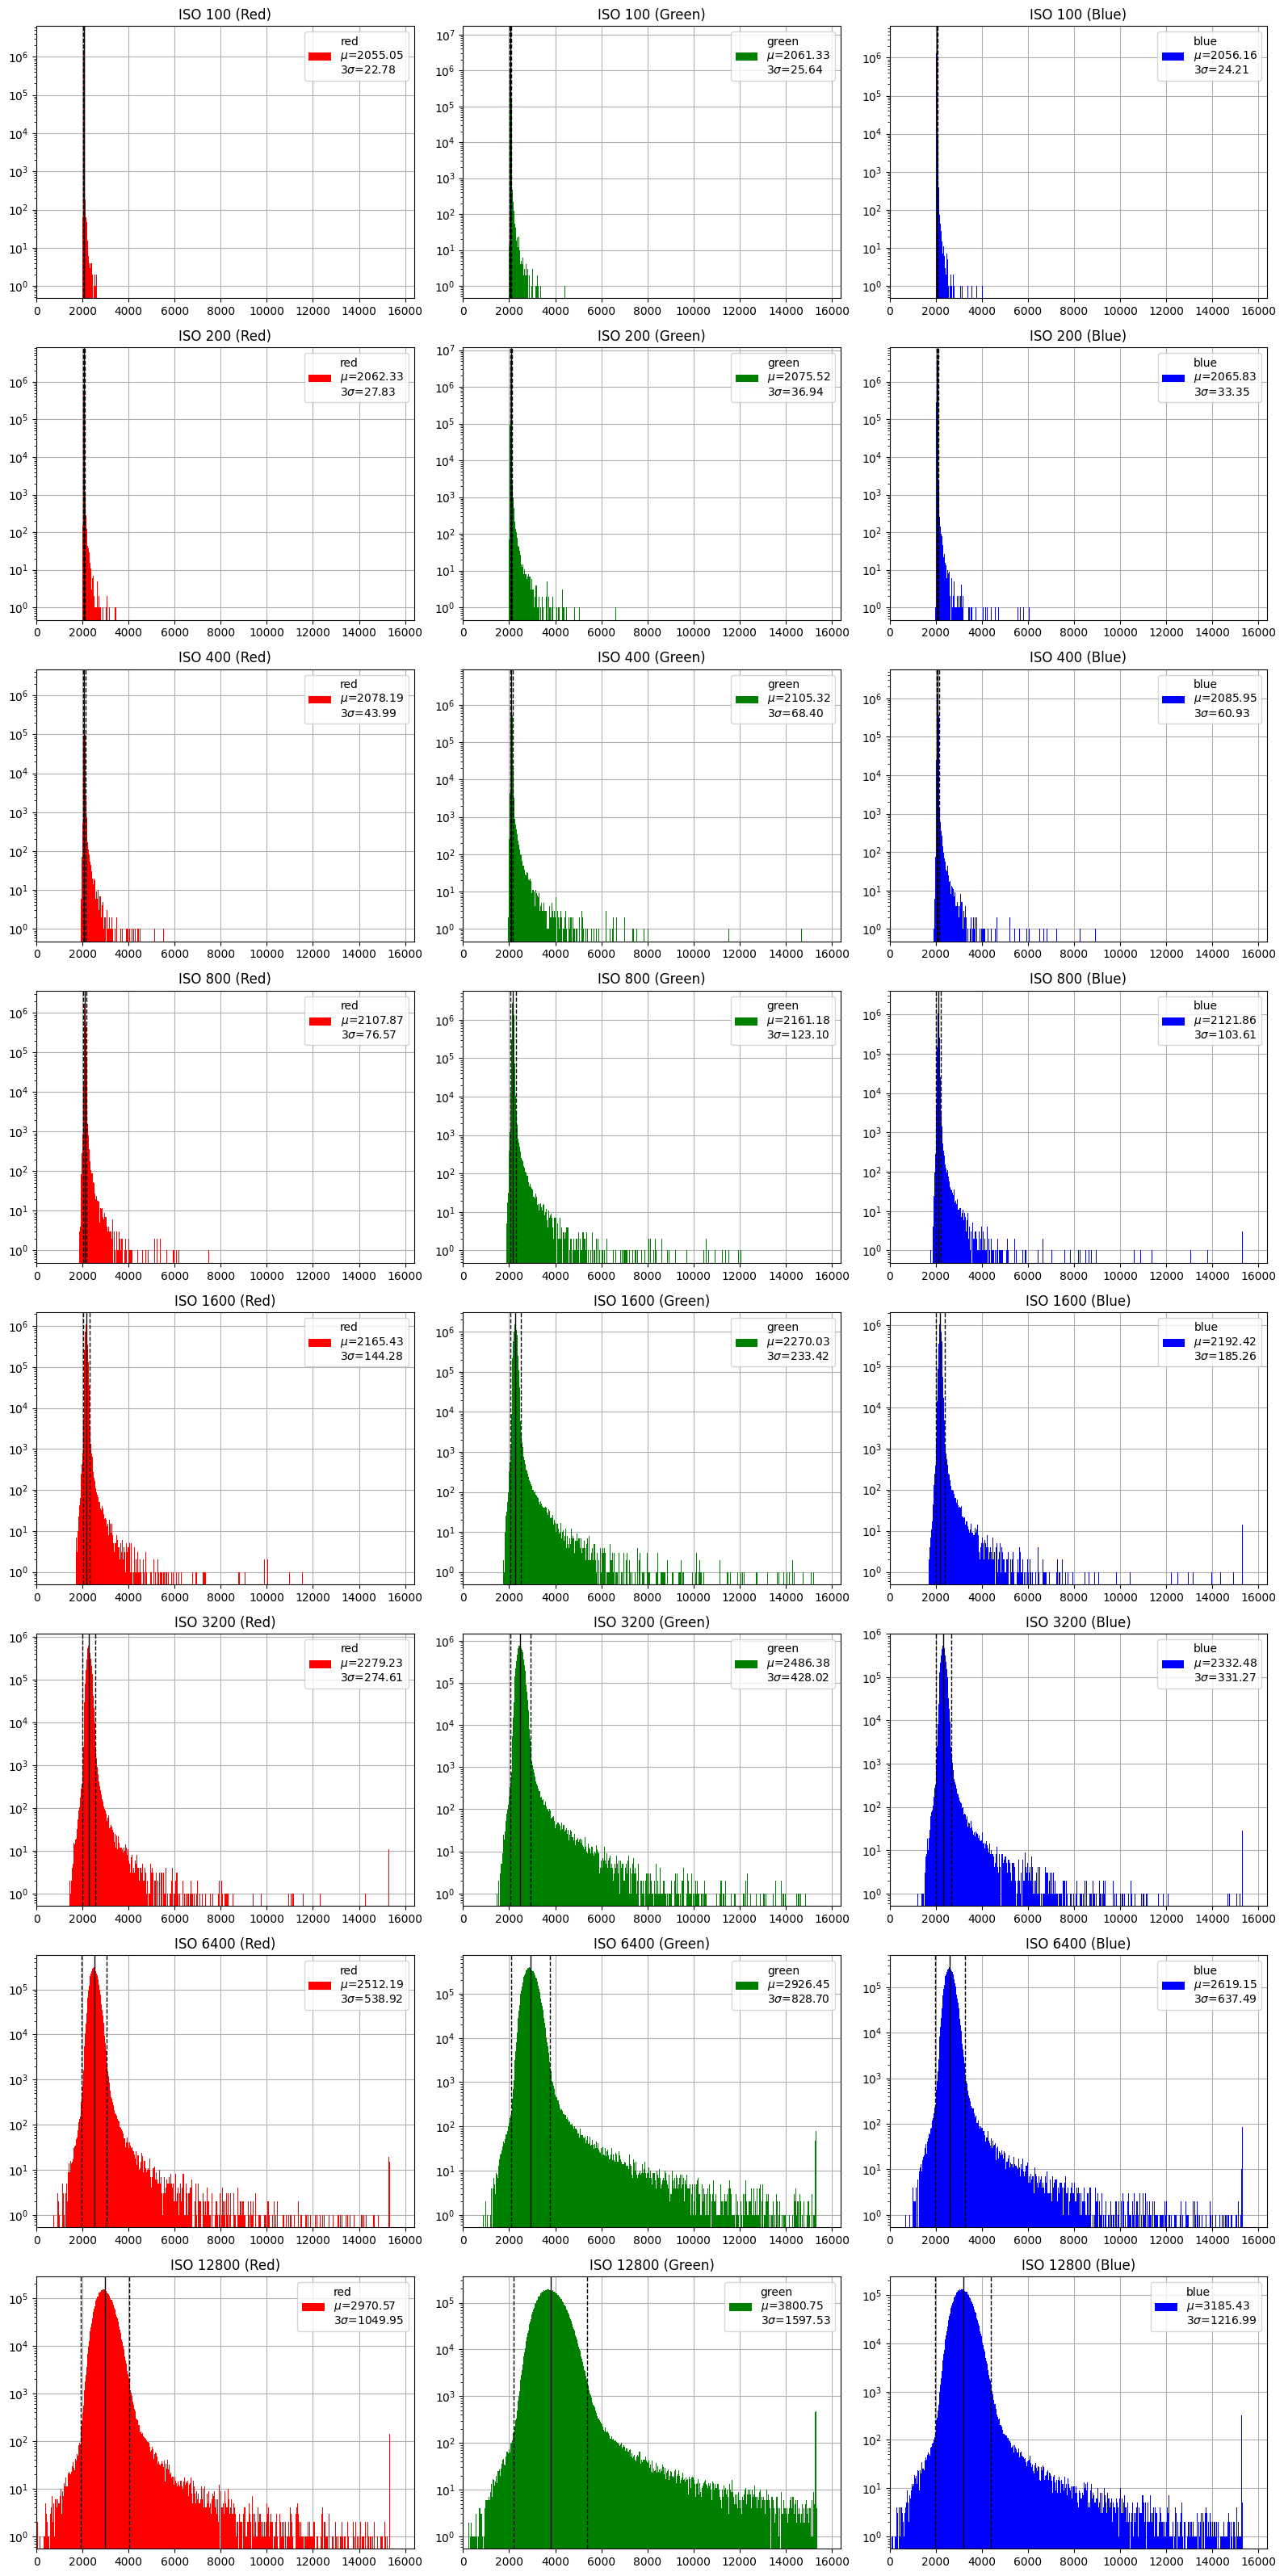

In [6]:
iso_series = cl.grab_series(df, "iso")
n_iso = len(iso_series)

print("Load images")
imgs = [
    (row["iso"], cl.RawImage(cl.Paths.data / row["filepath"]).load())
    for _, row in tqdm(iso_series.iterrows(), total=n_iso)
]

print("Plot histograms")
subplot_funcs = [cl.rgb_histograms(img.raw(), title=f"ISO {iso}") for iso, img in imgs]
fig = cl.subplots_grid(subplot_funcs, figsize=(16, 4*n_iso))
fig.savefig(cl.Paths.saved / "histograms_iso.png", dpi=300, bbox_inches="tight")
display(fig)

Load images


100%|██████████| 8/8 [00:18<00:00,  2.33s/it]


Plot histograms


100%|██████████| 24/24 [00:11<00:00,  2.16it/s]


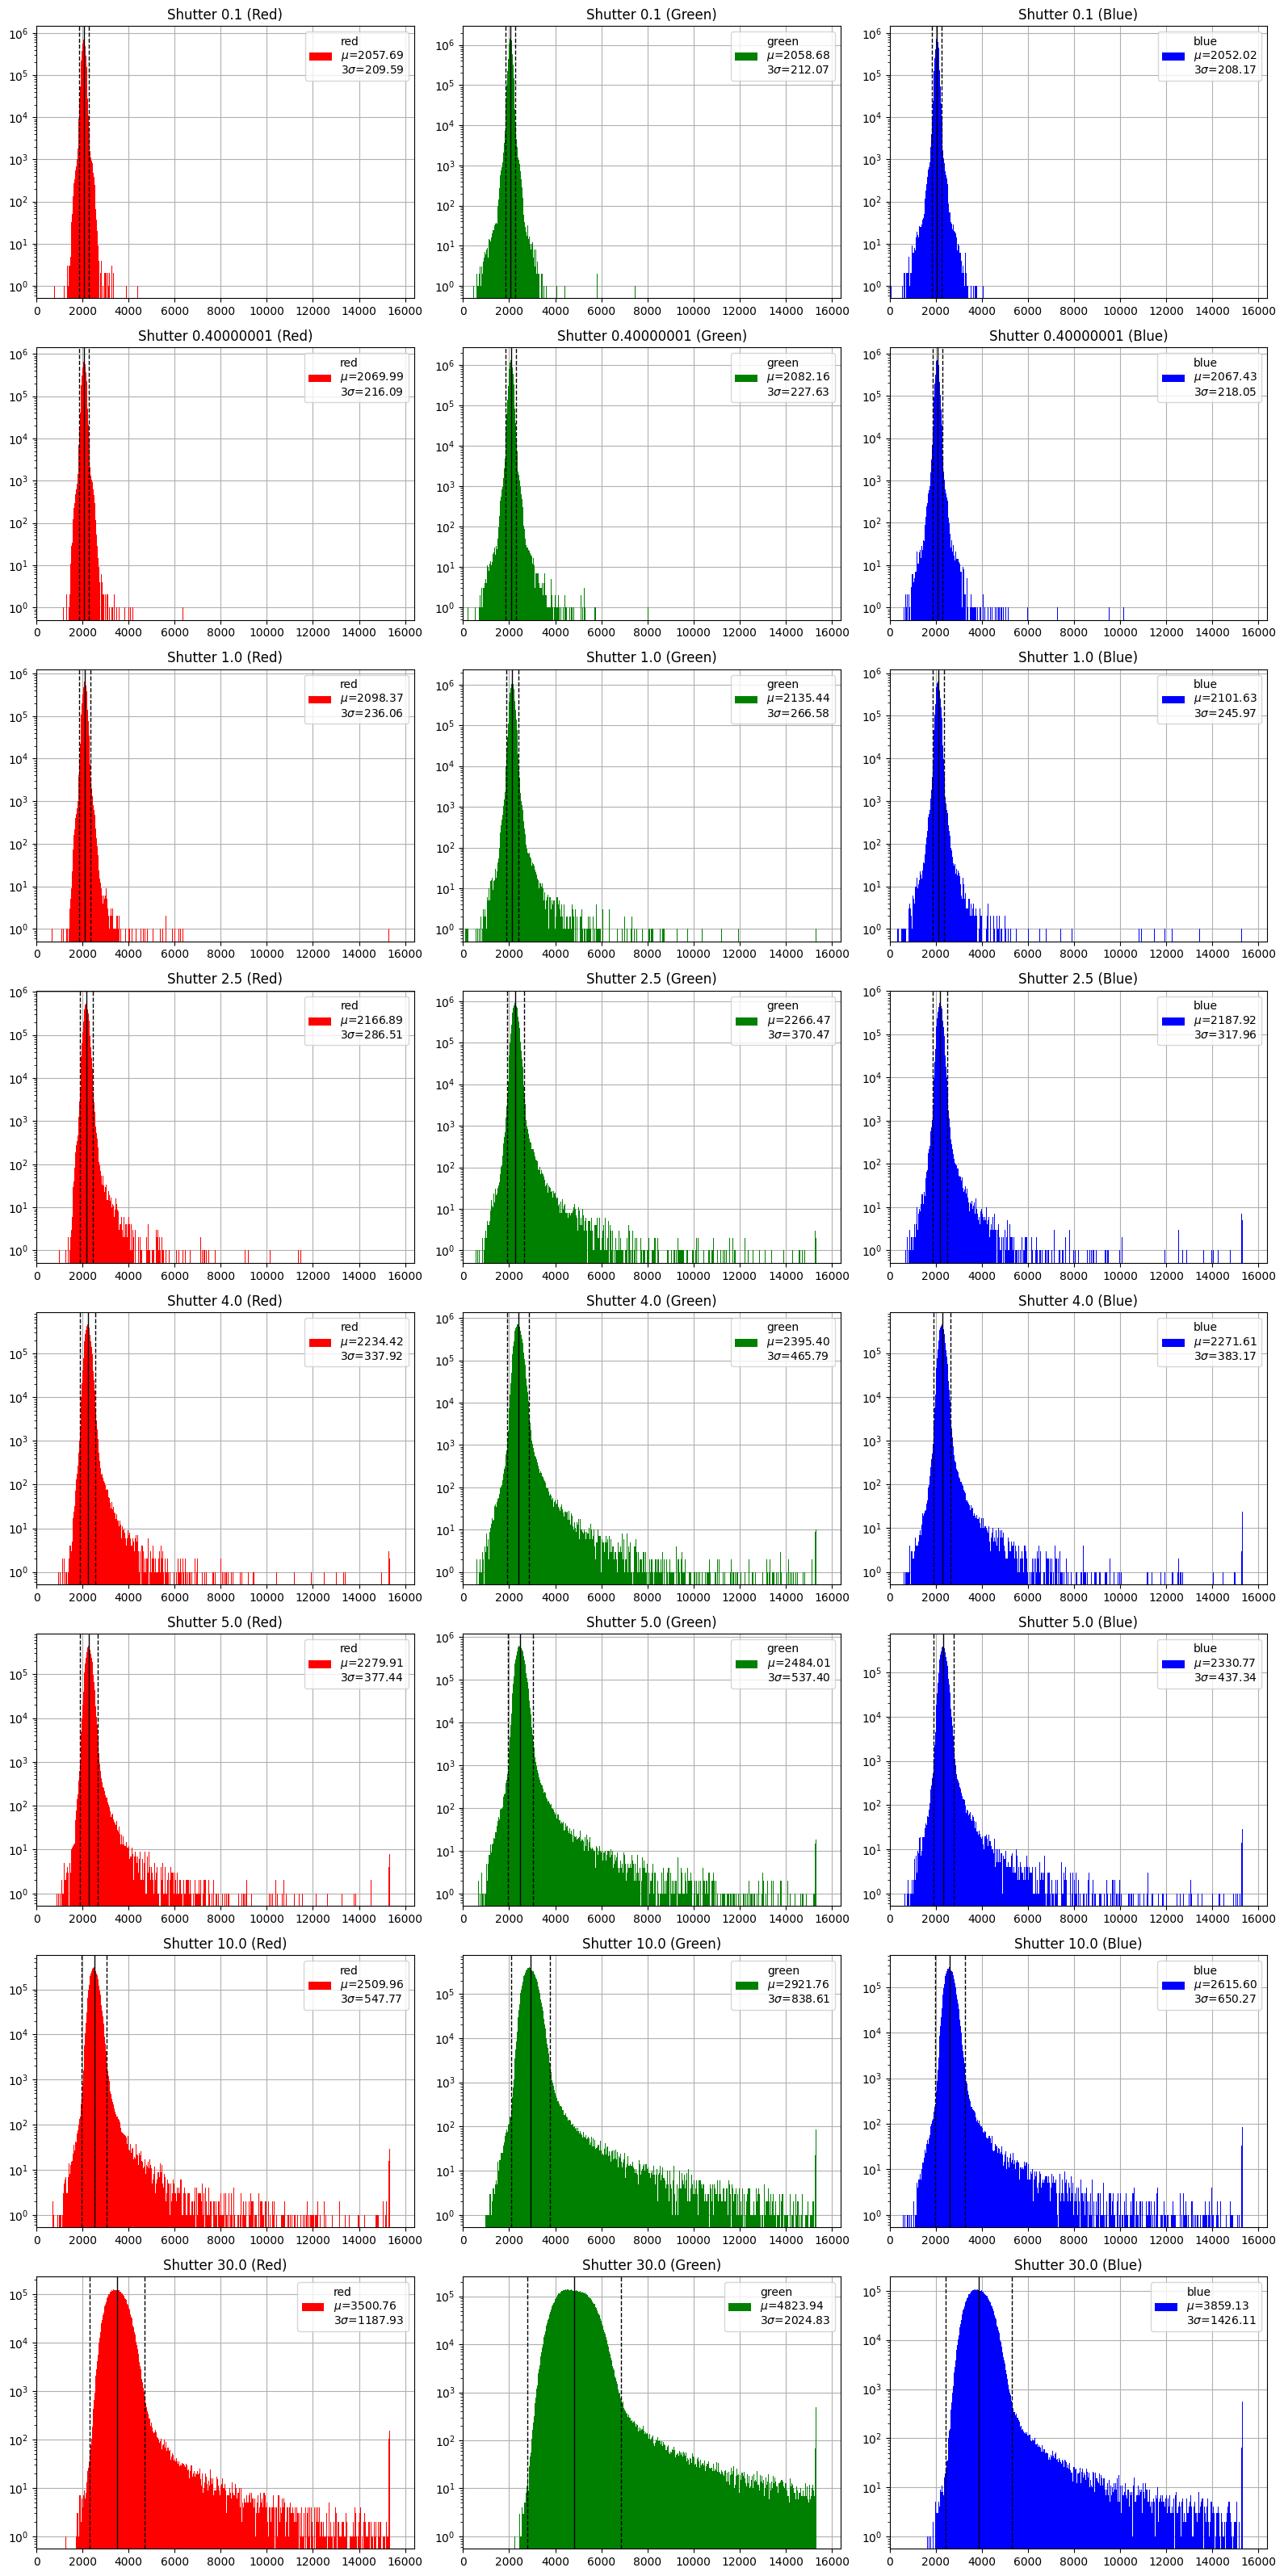

In [7]:
df_observed = df[df.filepath.str.startswith("observations")]
shutter_series = cl.grab_series(df_observed, "shutter")
n_shutter = len(shutter_series)

print("Load images")
imgs = [
    (row["shutter"], cl.RawImage(cl.Paths.data / row["filepath"]).load())
    for _, row in tqdm(shutter_series.iterrows(), total=n_shutter)
]

print("Plot histograms")
subplot_funcs = [cl.rgb_histograms(img.raw(), title=f"Shutter {shutter}") for shutter, img in imgs]
fig = cl.subplots_grid(subplot_funcs, figsize=(16, 4*n_shutter))
fig.savefig(cl.Paths.saved / "histograms_shutter.png", dpi=300, bbox_inches="tight")
display(fig)